In [129]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras

In [130]:
df = pd.read_csv(r'C:\Users\LENOVO\sentiment analysis.txt', names=['sentence', 'label'], sep='\t')

In [131]:
df

,sentence,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1000 non-null   object
 1   label     1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [133]:
df.isnull().sum()

sentence    0
label       0
dtype: int64

In [134]:
# Remove noise

In [135]:
import re
def denoise(text):
    text = text.lower()
    text = text.replace("+"," ")
    text = text.replace("-"," ")
    text = text.replace("#"," ")
    text = re.sub(r'[^a-zA-Z0-9\s]', '',text)
    return text
    

In [136]:
df['sentence'] = df['sentence'].apply(denoise)

In [137]:
df['sentence']

0                                   wow loved this place
1                                      crust is not good
2               not tasty and the texture was just nasty
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                              appetite instantly gone
997    overall i was not impressed and would not go back
998    the whole experience was underwhelming and i t...
999    then as if i hadnt wasted enough of my life th...
Name: sentence, Length: 1000, dtype: object

In [138]:
import gensim
from gensim.parsing.preprocessing import remove_stopwords
def rem_sw(text):
    text = remove_stopwords(text)
    return text

In [139]:
df['sentence'] = df['sentence'].apply(rem_sw)

In [140]:
df['sentence']

0                                        wow loved place
1                                             crust good
2                                    tasty texture nasty
3      stopped late bank holiday rick steve recommend...
4                            selection menu great prices
                             ...                        
995                    think food flavor texture lacking
996                              appetite instantly gone
997                                    overall impressed
998      experience underwhelming think ninja sushi time
999    hadnt wasted life poured salt wound drawing ti...
Name: sentence, Length: 1000, dtype: object

In [141]:
# defining corpus

In [142]:
corpus = df['sentence'][0:1000].values

In [143]:
# checking number of unique words
unique_words = []
all_word = []
for sentence in corpus:
    sen = sentence.split()
    for word in sen:
        if word not in unique_words:
            unique_words.append(word)

In [144]:
total_words = len(unique_words)

In [145]:
#converting text to number
from keras.preprocessing.text import one_hot
embedded_sentences = [one_hot(sent, len(unique_words)) for sent in corpus]
print(embedded_sentences )

[[8, 1579, 359], [1000, 1353], [89, 1641, 1663], [1285, 1147, 6, 1528, 1237, 1557, 1316, 1579], [446, 163, 981, 878], [44, 603, 93, 1610, 1662], [537, 399, 836, 335], [532, 1016, 233, 317, 1803, 1039, 1630, 1587], [926, 981], [981, 1104], [1651, 1273], [], [269, 533, 1570, 25, 80], [920, 1717, 798, 1340, 776, 992], [1813, 376, 1577, 1735, 673], [1616, 198, 1503, 1212], [316, 39], [1177, 1467, 1800, 1651], [359, 509, 1039, 1633, 322], [1016], [1184, 1507], [1137, 164], [1651, 1774], [533, 1409, 451], [635], [823, 1416, 190, 581, 1293, 1231, 1353], [804, 327, 1830], [141, 317, 981, 212, 769, 651, 549, 1320], [465, 1527, 1137, 173, 1259, 709, 1137, 435, 1204, 804, 1323, 1016, 1148, 1307], [569, 741, 61], [542, 1016, 1479, 926, 1421, 1115, 291, 318], [1016, 231, 166], [359, 701, 793], [1016, 1353, 601, 359, 1264, 1584, 115, 10, 1137, 1318, 498], [295, 1016, 359, 305], [1618, 222, 709, 1031], [1532, 274, 1353, 878], [561, 1651, 1693, 1112, 1016, 675, 1039, 885, 735], [270, 854, 1318], [1651

In [146]:
# finding sentence with max words
max_len = max(len(x) for x in embedded_sentences  )

In [147]:
max_len

18

In [148]:
# padding
from keras_preprocessing import sequence
padded_sentences = sequence.pad_sequences(embedded_sentences, max_len, padding='post')
print(padded_sentences)

[[   8 1579  359 ...    0    0    0]
 [1000 1353    0 ...    0    0    0]
 [  89 1641 1663 ...    0    0    0]
 ...
 [ 295  553    0 ...    0    0    0]
 [1390 1462  513 ...    0    0    0]
 [ 106  606 1596 ...    0    0    0]]


In [149]:
# data splitting

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sentences, df['label'])

In [151]:
X_train

array([[1137, 1735,    0, ...,    0,    0,    0],
       [1164,   61,  251, ...,    0,    0,    0],
       [1243,  741,  807, ...,    0,    0,    0],
       ...,
       [1294,  122, 1659, ...,    0,    0,    0],
       [1572,  899,  140, ...,    0,    0,    0],
       [ 569,  741,   61, ...,    0,    0,    0]])

# MODEL BUILDING

In [152]:
# LSTM

In [153]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN, Embedding

In [163]:
model = Sequential()
model.add(Embedding(len(unique_words), 20, input_length=max_len))
model.add(LSTM(10))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_36 (Embedding)    (None, 18, 20)            36920     
                                                                 
 lstm_4 (LSTM)               (None, 10)                1240      
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 38,171
Trainable params: 38,171
Non-trainable params: 0
_________________________________________________________________
None


In [164]:
History2 = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
24/24 [==============================] - 6s 58ms/step - loss: 0.6931 - acc: 0.5147 - val_loss: 0.6946 - val_acc: 0.4640
Epoch 2/10
24/24 [==============================] - 0s 16ms/step - loss: 0.6912 - acc: 0.5133 - val_loss: 0.6933 - val_acc: 0.4640
Epoch 3/10
24/24 [==============================] - 0s 16ms/step - loss: 0.6779 - acc: 0.5813 - val_loss: 0.6748 - val_acc: 0.5400
Epoch 4/10
24/24 [==============================] - 0s 19ms/step - loss: 0.5479 - acc: 0.8160 - val_loss: 0.5724 - val_acc: 0.7400
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.3572 - acc: 0.9133 - val_loss: 0.5995 - val_acc: 0.7200
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.2656 - acc: 0.9453 - val_loss: 0.5824 - val_acc: 0.7400
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.2128 - acc: 0.9560 - val_loss: 0.6331 - val_acc: 0.7400
Epoch 8/10
24/24 [==============================] - 1s 26ms/step - loss: 0.1926 - a

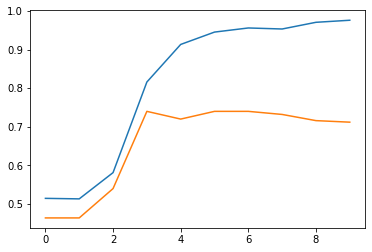

In [165]:
plt.plot(History2.history['acc'])
plt.plot(History2.history['val_acc'])
plt.show()

In [ ]:
#RNN

In [207]:
model1=Sequential()
model1.add(Embedding(len(unique_words), 20, input_length=max_len))
model1.add(SimpleRNN(10))
model1.add(Dropout(0.8))
model1.add(Dense(20, activation='sigmoid')) 
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model1.summary())

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_48 (Embedding)    (None, 18, 20)            36920     
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 10)                310       
                                                                 
 dropout_43 (Dropout)        (None, 10)                0         
                                                                 
 dense_51 (Dense)            (None, 20)                220       
                                                                 
 dense_52 (Dense)            (None, 1)                 21        
                                                                 
Total params: 37,471
Trainable params: 37,471
Non-trainable params: 0
_________________________________________________________________
None


In [208]:
History1 = model1.fit(X_train, y_train, epochs=10, verbose=1,validation_data=(X_test, y_test))

Epoch 1/10
24/24 [==============================] - 3s 30ms/step - loss: 0.6974 - accuracy: 0.5133 - val_loss: 0.7005 - val_accuracy: 0.4640
Epoch 2/10
24/24 [==============================] - 0s 11ms/step - loss: 0.6917 - accuracy: 0.5120 - val_loss: 0.6958 - val_accuracy: 0.4640
Epoch 3/10
24/24 [==============================] - 0s 11ms/step - loss: 0.6846 - accuracy: 0.5707 - val_loss: 0.6892 - val_accuracy: 0.5200
Epoch 4/10
24/24 [==============================] - 0s 12ms/step - loss: 0.6589 - accuracy: 0.6427 - val_loss: 0.6633 - val_accuracy: 0.6480
Epoch 5/10
24/24 [==============================] - 0s 12ms/step - loss: 0.5915 - accuracy: 0.7680 - val_loss: 0.6115 - val_accuracy: 0.7080
Epoch 6/10
24/24 [==============================] - 0s 13ms/step - loss: 0.5342 - accuracy: 0.8187 - val_loss: 0.5679 - val_accuracy: 0.7640
Epoch 7/10
24/24 [==============================] - 0s 19ms/step - loss: 0.4589 - accuracy: 0.8627 - val_loss: 0.6013 - val_accuracy: 0.6920
Epoch 8/10
24

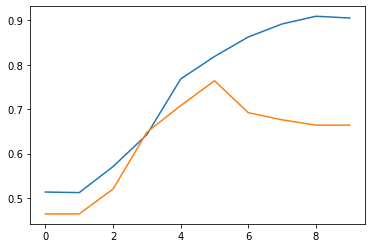

In [209]:
plt.plot(History1.history['accuracy'])
plt.plot(History1.history['val_accuracy'])
plt.show()

In [210]:
#CNN

In [206]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

In [218]:
model2 = Sequential()
model2.add(Embedding(total_words, 20, input_length = max_len))
model2.add(Conv1D(filters = 100, kernel_size = 3, activation = 'relu'))
model2.add(MaxPooling1D(2))
model2.add(Flatten())
model2.add(Dropout(.2))
model2.add(Dense(50, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid'))
model2.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
History = model2.fit(X_train, y_train, epochs = 5, validation_data = (X_test, y_test))

Epoch 1/5
24/24 [==============================] - 2s 21ms/step - loss: 2.2908 - accuracy: 0.0347 - val_loss: 1.3848 - val_accuracy: 0.0000e+00
Epoch 2/5
24/24 [==============================] - 0s 12ms/step - loss: 1.3601 - accuracy: 0.0000e+00 - val_loss: 1.2175 - val_accuracy: 0.0000e+00
Epoch 3/5
24/24 [==============================] - 0s 11ms/step - loss: 1.2695 - accuracy: 0.0320 - val_loss: 1.2157 - val_accuracy: 0.0200
Epoch 4/5
24/24 [==============================] - 0s 11ms/step - loss: 1.2558 - accuracy: 0.0347 - val_loss: 1.2056 - val_accuracy: 0.0520
Epoch 5/5
24/24 [==============================] - 0s 11ms/step - loss: 1.2439 - accuracy: 0.0320 - val_loss: 1.2057 - val_accuracy: 0.0160


In [219]:
import matplotlib.pyplot as plt

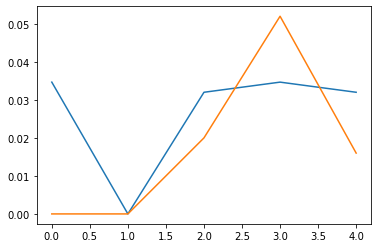

In [220]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.show()